<a href="https://colab.research.google.com/github/kshitij0209ag/Data-Scient-Project_11_FEB_2021/blob/main/Amazon_sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('amazon_vfl_reviews.csv')

df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...


In [155]:
df.shape

(2782, 5)

In [156]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [157]:
df['review'].isnull().sum()

4

In [158]:
df['name'].sample(n=3)

183      Mamaearth-Moisturizing-Baby-Bathing-Oatmeal
281             Godrej-aer-Pocket-Bathroom-Fragrance
113    Mamaearth-Illuminate-Vitamin-Radiant-Turmeric
Name: name, dtype: object

In [159]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

            asin                             name       date  rating review
2248  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2258  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2631  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN
2641  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN


In [160]:
df.dropna(inplace=True)

In [161]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [162]:
df['brandName'] = df['name'].str.split('-').str[0]
df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

# we have to change the another chart

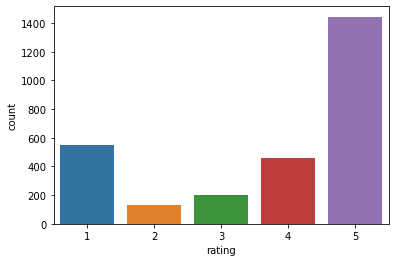

In [163]:
df.columns
sns.countplot(x='rating', data=df)

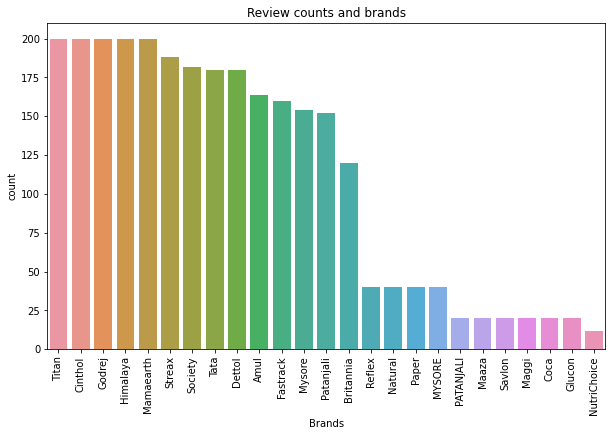

In [164]:
plt.figure(figsize = (10,6))
sns.barplot(df['brandName'].value_counts()
[:25].index,df['brandName'].value_counts()
[:25].values)
plt.title('Review counts and brands')
plt.xlabel('Brands')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [165]:
import string


In [166]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [167]:
#converting to lower case
df['clean_review_text']=df['review'].str.lower()
#removing punctuations
df['clean_review_text']=df['clean_review_text'].str.translate(str.maketrans('','',string.punctuation))
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']

def removeStopWords(stopWords, rvw_txt):
  newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
  return newtxt
df['clean_review_text'] = [removeStopWords(stopWords,x) 
for x in df['clean_review_text']]

In [168]:
df.head()

,asin,name,date,rating,review,brandName,clean_review_text
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...


In [169]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [170]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores = []
sentiment_score_flag = []
for text in df['clean_review_text']:
    sentimentResults = sentiment_model.polarity_scores(text)
    sentiment_score = sentimentResults["compound"]
    sentiment_scores.append(sentiment_score)
    if sentimentResults['compound'] >= 0.05:
        sentiment_score_flag.append('positive')
    elif sentimentResults['compound'] <= -0.05:
        sentiment_score_flag.append('negative')
    else:
        sentiment_score_flag.append('neutral')

df['scores'] = sentiment_scores
df['scoreStatus'] = sentiment_score_flag
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...,0.8147,positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...,0.8689,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...,-0.6820,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...,-0.6124,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...,0.9286,positive


In [171]:
df = df[df["scoreStatus"].str.contains("neutral") == False]
# df.drop(df.index[['neutral']], inplace=True)
# df = df.drop(df[df['scoreStatus']]== "neutral", axis=1)
# df[df['scoreStatus']] == "neutral'
# df[df.scoreStatus == 'neutral']

In [172]:
df.shape


(2528, 9)

In [173]:
# pip install WordCloud

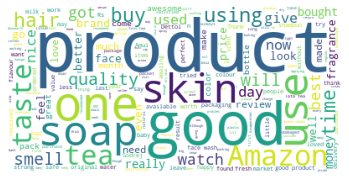

In [174]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='white').generate(' '.join(df['review']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


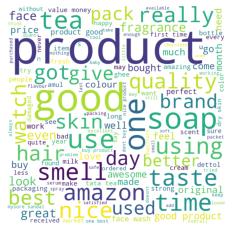

In [175]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(width=1000, height=1000, background_color='white',
                       min_font_size=20).generate(' '.join(df['clean_review_text']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


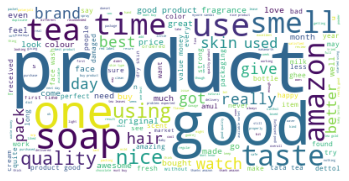

In [176]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='white').generate(
    ' '.join(df['clean_review_text']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# TF and TF-IDF Vectorizer

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [178]:
tf = TfidfVectorizer()


In [179]:
x = tf.fit_transform(df['clean_review_text']).toarray()
print(x)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Bag of words

In [180]:
from sklearn.feature_extraction.text import CountVectorizer


In [181]:
features = CountVectorizer()
features.fit(df['clean_review_text'])


CountVectorizer()

In [182]:
bagofWords = features.transform(df['clean_review_text'])


# Representation of output [note]

In [183]:
print(bagofWords)

  (0, 303)	1
  (0, 385)	1
  (0, 702)	2
  (0, 709)	1
  (0, 721)	2
  (0, 797)	1
  (0, 829)	1
  (0, 912)	1
  (0, 1040)	1
  (0, 1069)	1
  (0, 1232)	1
  (0, 1629)	1
  (0, 1630)	1
  (0, 1706)	1
  (0, 1823)	1
  (0, 1893)	1
  (0, 2061)	1
  (0, 2068)	3
  (0, 2150)	1
  (0, 2165)	1
  (0, 2592)	1
  (0, 2799)	1
  (0, 2850)	2
  (0, 2871)	1
  (0, 3272)	3
  :	:
  (2523, 4638)	2
  (2524, 155)	1
  (2524, 621)	1
  (2524, 1666)	1
  (2524, 4405)	1
  (2524, 5090)	1
  (2524, 5359)	1
  (2525, 1775)	1
  (2526, 3700)	1
  (2526, 4646)	1
  (2527, 621)	1
  (2527, 1151)	1
  (2527, 1329)	1
  (2527, 1532)	1
  (2527, 1926)	1
  (2527, 2308)	2
  (2527, 2326)	1
  (2527, 2351)	1
  (2527, 2656)	1
  (2527, 3069)	2
  (2527, 3944)	1
  (2527, 4346)	1
  (2527, 4405)	1
  (2527, 4456)	1
  (2527, 4638)	2


In [184]:
df['clean_review_text'].shape

(2528,)

In [185]:
bagofWords.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
df1 = pd.get_dummies(data=df, columns=['scoreStatus'])
df1.columns


Index(['asin', 'name', 'date', 'rating', 'review', 'brandName',
       'clean_review_text', 'scores', 'scoreStatus_negative',
       'scoreStatus_positive'],
      dtype='object')

In [187]:
df1.head()

,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus_negative,scoreStatus_positive
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...,0.8147,0,1
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...,0.8689,0,1
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...,-0.6820,1,0
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...,-0.6124,1,0
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...,0.9286,0,1


In [188]:
df1['scoreStatus_negative'].replace({1: 'Negative'}, inplace=True)
df1['scoreStatus_positive'].replace({1: 'Positive'}, inplace=True)


In [214]:
df1.head()

,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus_negative,scoreStatus_positive
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...,0.8147,0,Positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...,0.8689,0,Positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...,-0.6820,Negative,0
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...,-0.6124,Negative,0
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...,0.9286,0,Positive


# concatenation of two columns

In [190]:
# df = pd.concat(df.scoreStatus, df.scores)

# pd.concat([df.scoreStatus, df.scores], axis=1)





In [191]:
# df['scoreStatus'] == 'negative'


In [192]:
# negative_reviews = df[df['scoreStatus'] == 'negative']
# negative_reviews

In [193]:
# df.name.unique()

In [194]:
# positive_reviews = df[df['scoreStatus'] == 'positive']
# positive_reviews


# Negative brands and Positive brands Drop 

In [195]:
# df3['Positive_Brands']= df[df['scoreStatus'] == "positive"]
# df3['Negative_Brands'] = df[df['scoreStatus'] == "negative"]


In [196]:
# df.info()

In [197]:
# Positive_Brands.dtypes

In [198]:
# Positive_Brands

In [199]:
# Negative_Brands

In [200]:
# Positive_Brands = Positive_Brands.drop(['asin','name', 'date','rating','review','brandName', 'clean_review_text', 'scores'], axis=1)


In [201]:
# Positive_Brands

In [202]:
# Negative_Brands = Negative_Brands.drop(['asin', 'name', 'date', 'rating', 'review', 
# 'brandName', 'clean_review_text', 'scores'], axis=1)


In [203]:
# Negative_Brands.head

In [204]:
# df3 = pd.concat([Positive_Brands, Negative_Brands], axis = 1)


In [205]:
# df3.head

In [206]:
# df3.isnull().sum()


In [207]:
# df = pd.concat([df3, df], axis = 1)

In [208]:
# df.head()

In [209]:
# df3.columns

# Algorithms 
                                             Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
LR = LogisticRegression()

In [212]:
from sklearn.model_selection import train_test_split

In [213]:


# X_train, X_test, Y_train, Y_test

SyntaxError: invalid syntax (<ipython-input-213-a0fe247651c1>, line 1)